# Assignment 8: Gradient Descent (Task 2)

For this assignment, you may use `numpy`, `pandas`, and packages from the Python standard library.

List your team members (name, matriculation number, course of study) in the following cell:

* Your names here

In this task, you will implement the training of linear regression model by using Mean Squarred Error and Correntropy loss functions. Use gradient descent to optimize the weights of linear regression model. The definition of MSE and Correntropy loss fucntions are given in the Assignment8.pdf file.

There will be two linear regression models, one is trained by using MSE loss and the other is trained by Correntropy loss function.

In addition, two different learning rates are used for training of each model. The reason is that each loss function has different shape and requires specific learning rate.

Implement the MSE and Correntropy loss funcitons in the given function templates. Additionally, compute gradients of MSE and Correntropy loss functions and impement them in the corresponding function templates. The gradient should be computed given particular data sample ($x_i, y_i$).

The data is generated by sampling from the linear function $f(x) = 2x$, and the output of the third data sample is contaminated by noise.

In [ ]:
import numpy as np
import scipy.optimize
from matplotlib import pyplot as plt

In [ ]:
#Weight initialization
w_mse = 0.1
w_corr = 0.1

In [ ]:
#learning rate for MSE and Correntropy loss optimization
lr = 0.001
lr_corr = 0.1

In [ ]:
#Define Mean Squared Error Function
def mse(w_mse, x, y_noise):
    mse = np.sum(np.power((y_noise - w_mse*x),2))
    return mse

#Define Correntopy Function
def corr(w_corr, y_noise, x):
    t = np.power((y_noise - w_corr*x),2)
    corr  = -np.sum(np.exp(-t))
    return corr

In [ ]:
#Define Gradient of MSE Function
def mse_radient(w_mse, xi, yi):
    #fill here with gradient of MSE
    mse_grad = -2*w_mse*(yi - w_mse*xi)
    return mse_grad

#Define Gradient of Correntropy Function
def corr_gradient(w_corr, xi, yi):
    #fill here with gradient of Correntropy
    corr_grad = -2* w_corr * (yi - w_corr*xi) * np.exp(-np.power(np.linalg.norm(yi - w_corr*xi),2))
    return corr_grad

In [ ]:
#Generate Data
x = np.arange(5)
y = 2*x

In [ ]:
# Impulsive Noide (make one sample contaminated with high noise)
y_noise = y.copy()
y_noise[2] = 100

In [ ]:
def training(x, y, y_noise, w_mse, w_corr, lr, lr_corr):
    for i in range(1000):
        ids = np.random.randint(5)
        xi = x[ids]
        yi = y_noise[ids]
        #Update linear regression weights based on MSE
        #Update linear regression weights based on Correntropy
        w_mse = w_mse - lr * mse_radient(w_mse, xi, yi)
        w_corr = w_corr - lr_corr * corr_gradient(w_corr, xi, yi)

    #Final Loss Values
    err = mse(w_mse, x, y_noise )
    coerr = corr(w_corr, x, y_noise)

    #Approximation of Output With Linear Function Trained on MSE and Correntropy
    y_mse = w_mse*x
    y_corr = w_corr*x

    #Plot the output of linear function trained with MSE and Correntopy
    plt.figure()
    plt.plot(x, y_corr, 'b', label ="Correntopy")
    plt.plot(x, y_mse, 'g', label ="MSE")
    plt.plot(x, y_noise, 'ro')
    plt.plot(x, y, 'r*')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig("mm_limit.png")
    plt.legend()
    plt.show();

    return err, coerr


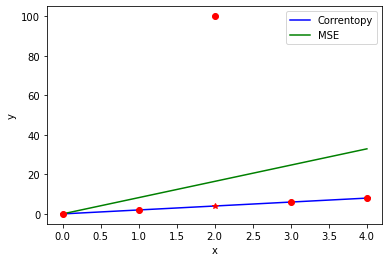

(7988.0482055920875, -1.0001234098040868)

In [ ]:
training(x, y, y_noise, w_mse, w_corr, lr, lr_corr)

As can be seen in the figure, linear model which was trained by using correntropy loss function perform robust to noise. This is justified by looking at the gradient of MSE and Correntropy losses. Both are similar, but the gradient of Correntropy contains additional term which reduces the effect of noises with large values. That is why noise is ignored in updating the weights of the linear model.